In [1]:
# The following is from https://networkx.github.io/documentation/networkx-1.10/examples/algorithms/davis_club.html
"""
Davis Southern Club Women

Shows how to make unipartite projections of the graph and compute the
properties of those graphs.

These data were collected by Davis et al. in the 1930s.
They represent observed attendance at 14 social events by 18 Southern women.
The graph is bipartite (clubs, women).
"""
%matplotlib inline
import csv
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import networkx.algorithms.bipartite as bi




In [2]:
#Pulling in the graph information
G = nx.davis_southern_women_graph()
women = G.graph['top']
clubs = G.graph['bottom']


In [3]:
print women
print clubs

['Evelyn Jefferson', 'Laura Mandeville', 'Theresa Anderson', 'Brenda Rogers', 'Charlotte McDowd', 'Frances Anderson', 'Eleanor Nye', 'Pearl Oglethorpe', 'Ruth DeSand', 'Verne Sanderson', 'Myra Liddel', 'Katherina Rogers', 'Sylvia Avondale', 'Nora Fayette', 'Helen Lloyd', 'Dorothy Murchison', 'Olivia Carleton', 'Flora Price']
['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'E13', 'E14']


drawing nodes...
{'None': 'r'}
drawing edges...
drawing labels...


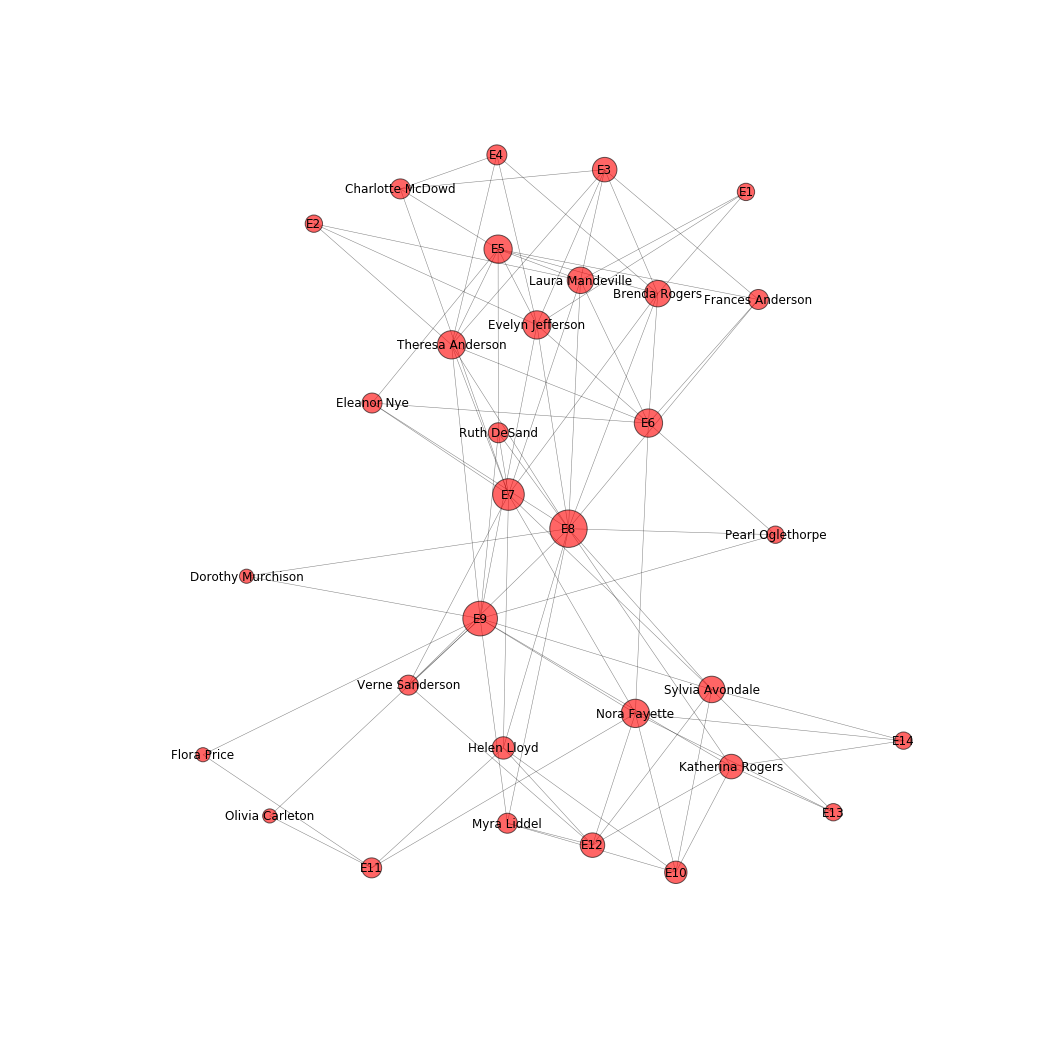

In [4]:
# By using the function from the text we can visualize the most inclusive/exclusive clubs
#and which women belong to the most clubs. E8 and E9 seem to have the most attendees

#Even if a woman was in very few clubs but those clubs included E8 and/or E9 they would show as having many friends.
#This function helps identify subgroups but since it is a relatively connected group we wont have 
#cliques(still a useful visualization)

pos=nx.spring_layout(G) 
from collections import defaultdict
import multimode as mm
fig = plt.figure(figsize=(18, 18))
mm.plot_multimode(G, type_string='clubs')
plt.show()


#Friends, Member
17 Evelyn Jefferson
15 Laura Mandeville
17 Theresa Anderson
15 Brenda Rogers
11 Charlotte McDowd
15 Frances Anderson
15 Eleanor Nye
16 Pearl Oglethorpe
17 Ruth DeSand
17 Verne Sanderson
16 Myra Liddel
16 Katherina Rogers
17 Sylvia Avondale
17 Nora Fayette
17 Helen Lloyd
16 Dorothy Murchison
12 Olivia Carleton
12 Flora Price


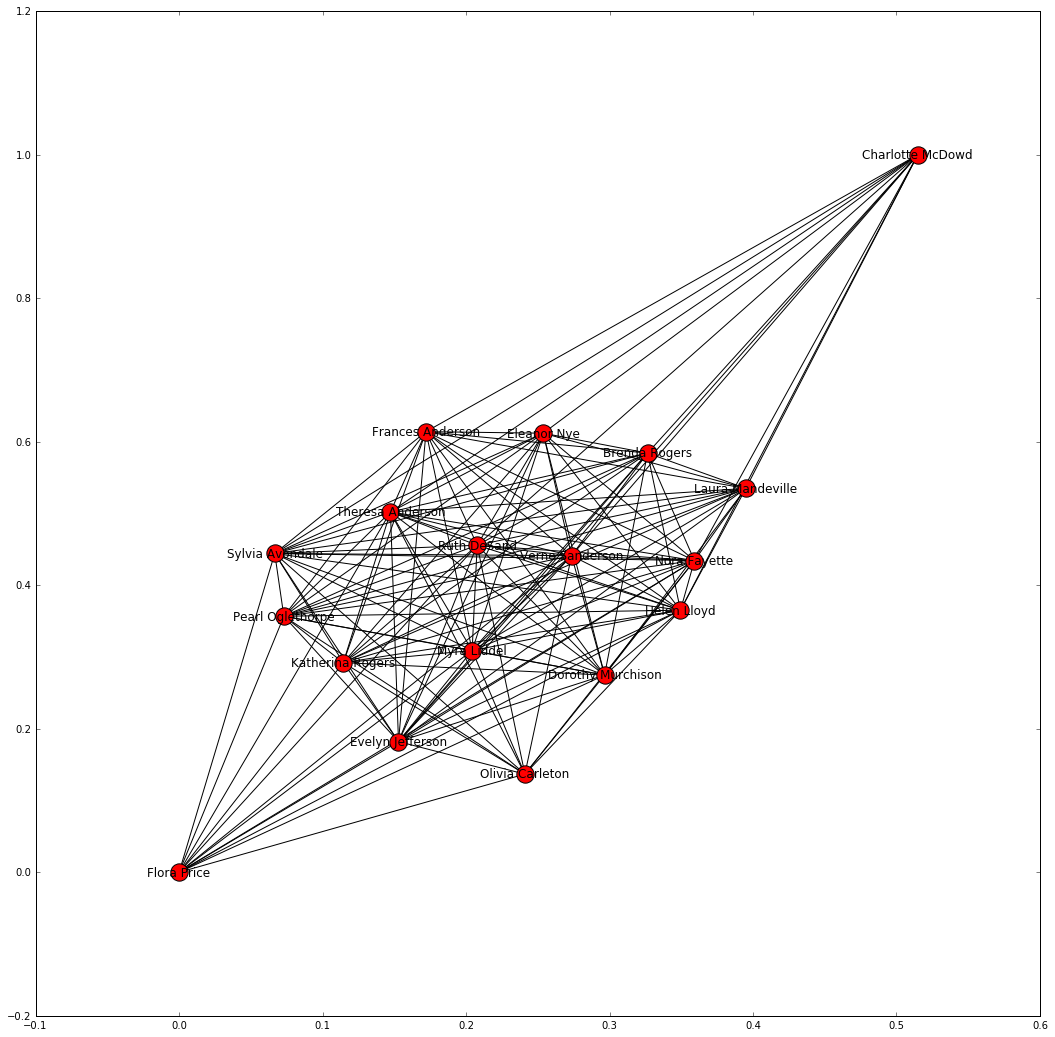

In [5]:
# project bipartite graph onto women nodes, see the friends
W = bi.projected_graph(G, women)
print('')
print("#Friends, Member")
for w in women:
    print('%d %s' % (W.degree(w),w))

pos=nx.spring_layout(W) 
fig = plt.figure(figsize=(18, 18))
nx.draw_networkx(W, pos)
plt.show()

In [6]:
#function to sort our results. For degree centraility as we would expect the person with 
#the most 'friends' has the most connections. This was just an exercise.
def sorted_map(map):
    ms = sorted(map.iteritems(), key=lambda (k,v): (-v,k))
    return ms

dc = nx.degree_centrality(W)
dc = sorted_map(dc)
dc[0:]

[('Evelyn Jefferson', 1.0),
 ('Helen Lloyd', 1.0),
 ('Nora Fayette', 1.0),
 ('Ruth DeSand', 1.0),
 ('Sylvia Avondale', 1.0),
 ('Theresa Anderson', 1.0),
 ('Verne Sanderson', 1.0),
 ('Dorothy Murchison', 0.9411764705882353),
 ('Katherina Rogers', 0.9411764705882353),
 ('Myra Liddel', 0.9411764705882353),
 ('Pearl Oglethorpe', 0.9411764705882353),
 ('Brenda Rogers', 0.8823529411764706),
 ('Eleanor Nye', 0.8823529411764706),
 ('Frances Anderson', 0.8823529411764706),
 ('Laura Mandeville', 0.8823529411764706),
 ('Flora Price', 0.7058823529411764),
 ('Olivia Carleton', 0.7058823529411764),
 ('Charlotte McDowd', 0.6470588235294118)]

In [9]:
# we are starting to see the key players in this network.
bw = nx.betweenness_centrality(W)
bw = sorted_map(bw)
bw[0:]


[('Evelyn Jefferson', 0.010122230710466005),
 ('Helen Lloyd', 0.010122230710466005),
 ('Nora Fayette', 0.010122230710466005),
 ('Ruth DeSand', 0.010122230710466005),
 ('Sylvia Avondale', 0.010122230710466005),
 ('Theresa Anderson', 0.010122230710466005),
 ('Verne Sanderson', 0.010122230710466005),
 ('Dorothy Murchison', 0.005347593582887701),
 ('Katherina Rogers', 0.005347593582887701),
 ('Myra Liddel', 0.005347593582887701),
 ('Pearl Oglethorpe', 0.005347593582887701),
 ('Brenda Rogers', 0.00267379679144385),
 ('Eleanor Nye', 0.00267379679144385),
 ('Frances Anderson', 0.00267379679144385),
 ('Laura Mandeville', 0.00267379679144385),
 ('Charlotte McDowd', 0.0),
 ('Flora Price', 0.0),
 ('Olivia Carleton', 0.0)]

In [21]:
# we are starting to see the key players in this network, but with Eigenvector centrality 
#we can identify the well connected individuals. Brenda Rogers and Laura Mandeville stand out as people who has more power
#than we may have expected at first glance. 

eg = nx.eigenvector_centrality(W)
eg = sorted_map(eg)
eg[0:]

[('Theresa Anderson', 0.3535543079787813),
 ('Evelyn Jefferson', 0.31851939808941326),
 ('Brenda Rogers', 0.3042441458828134),
 ('Laura Mandeville', 0.3004071023132385),
 ('Sylvia Avondale', 0.27287816402411424),
 ('Nora Fayette', 0.25327409433896136),
 ('Ruth DeSand', 0.24851046730154439),
 ('Eleanor Nye', 0.23903727426379084),
 ('Verne Sanderson', 0.23070022516533012),
 ('Katherina Rogers', 0.22197541991016084),
 ('Frances Anderson', 0.21795620141635108),
 ('Helen Lloyd', 0.20694099815460332),
 ('Myra Liddel', 0.19772737738736912),
 ('Pearl Oglethorpe', 0.19401096912533003),
 ('Charlotte McDowd', 0.17419271498707897),
 ('Dorothy Murchison', 0.14601319874928245),
 ('Flora Price', 0.07747514231744787),
 ('Olivia Carleton', 0.07747514231744787)]

In [20]:
names1=[x[0] for x in dc[0:]]
names2=[x[0] for x in bw[0:]]
names3=[x[0] for x in eg[0:]]

In [17]:
# project bipartite graph onto women nodes keeping number of co-occurence
# the degree computed is weighted and counts the total number of shared contacts
W = bi.weighted_projected_graph(G, women)
print('')
print("#Friend meetings, Member")
for w in women:
    print('%d %s' % (W.degree(w,weight='weight'),w))



#Friend meetings, Member
50 Evelyn Jefferson
45 Laura Mandeville
57 Theresa Anderson
46 Brenda Rogers
24 Charlotte McDowd
32 Frances Anderson
36 Eleanor Nye
31 Pearl Oglethorpe
40 Ruth DeSand
38 Verne Sanderson
33 Myra Liddel
37 Katherina Rogers
46 Sylvia Avondale
43 Nora Fayette
34 Helen Lloyd
24 Dorothy Murchison
14 Olivia Carleton
14 Flora Price


drawing nodes...
{'None': 'r'}
drawing edges...
drawing labels...


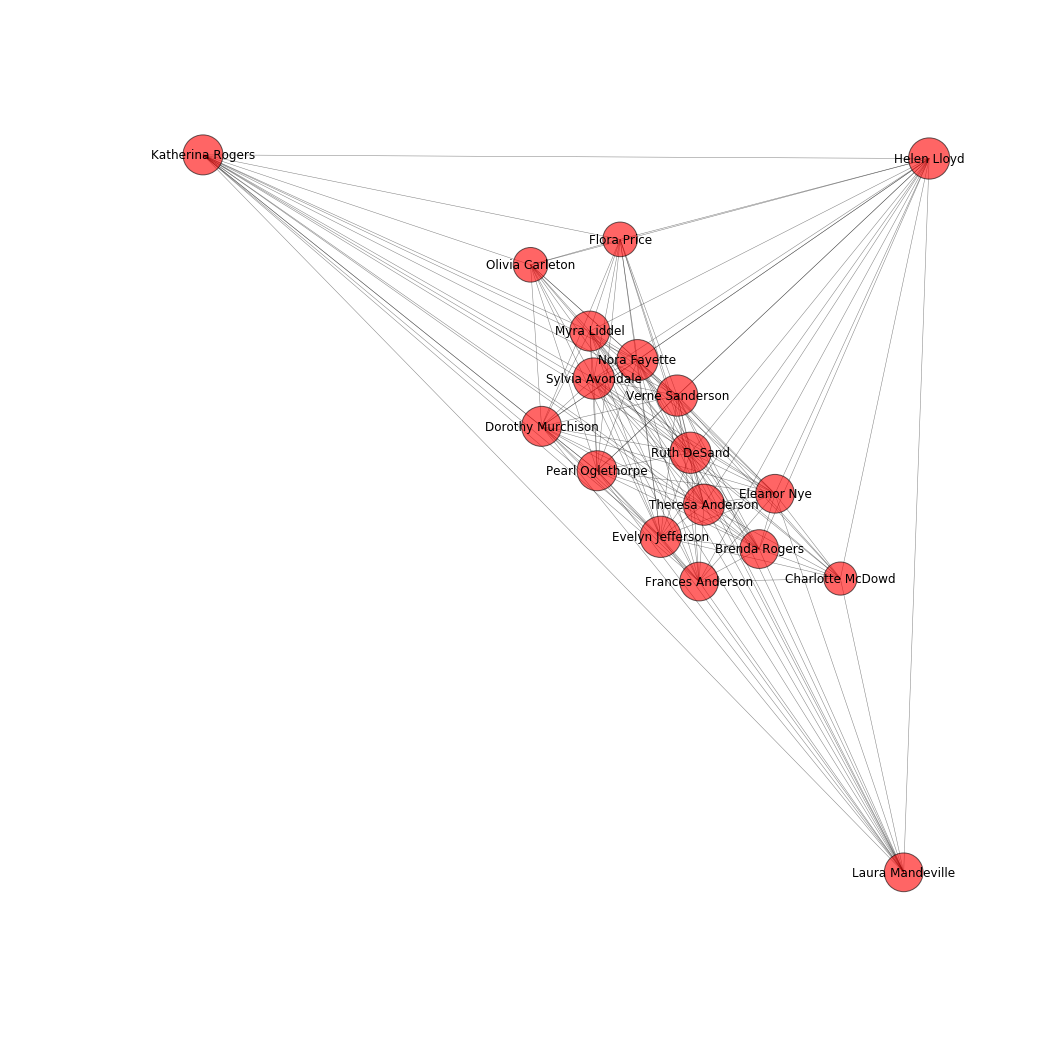

In [18]:
#You can see the least influential here have slightly smaller nodes (Flora and Olivia for example)
pos=nx.spring_layout(W) 


from collections import defaultdict
import multimode as mm
fig = plt.figure(figsize=(18, 18))
mm.plot_multimode(W, type_string='women')
plt.show()